In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('Trips_2018.csv',index_col=0)

In [3]:
print(df.head())
print(df.info())
print(df.describe())

   tripduration                 starttime                  stoptime  \
0           970  2018-01-01 13:50:57.4340  2018-01-01 14:07:08.1860   
1           723  2018-01-01 15:33:30.1820  2018-01-01 15:45:33.3410   
2           496  2018-01-01 15:39:18.3370  2018-01-01 15:47:35.1720   
3           306  2018-01-01 15:40:13.3720  2018-01-01 15:45:20.1910   
4           306  2018-01-01 18:14:51.5680  2018-01-01 18:19:57.6420   

   start_station_id  start_station_latitude  start_station_longitude  \
0              72.0               40.767272               -73.993929   
1              72.0               40.767272               -73.993929   
2              72.0               40.767272               -73.993929   
3              72.0               40.767272               -73.993929   
4              72.0               40.767272               -73.993929   

   end_station_id  end_station_latitude  end_station_longitude  bikeid  \
0           505.0             40.749013             -73.988484   3

In [4]:
print((df['start_station_latitude'] > 45).sum())
print((df['start_station_id'].nunique()))

81
818


In [5]:
df1 = df[df['start_station_latitude'] <= 45]


In [6]:
df1['starttime'] = pd.to_datetime(df1['starttime'])
df1['stoptime']  = pd.to_datetime(df1['stoptime'])

df1['date'] = df1['starttime'].dt.date
df1['hour'] = df1['starttime'].dt.hour
df1['day_of_week'] = df1['starttime'].dt.day_name()
df1['month'] = df1['starttime'].dt.month
df1['week'] = df1['starttime'].dt.isocalendar().week

C:\Users\Ludvig\AppData\Local\Temp\ipykernel_9240\3553944963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['starttime'] = pd.to_datetime(df1['starttime'])
C:\Users\Ludvig\AppData\Local\Temp\ipykernel_9240\3553944963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['stoptime']  = pd.to_datetime(df1['stoptime'])
C:\Users\Ludvig\AppData\Local\Temp\ipykernel_9240\3553944963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [7]:
print("Rows:", len(df1))
print("Date range:", df1['starttime'].min(), "to", df1['starttime'].max())
df1.describe(include="all")

Rows: 17548258
Date range: 2018-01-01 00:01:50.650000 to 2018-12-31 23:59:51.085000


C:\Users\Ludvig\AppData\Local\Temp\ipykernel_9240\1495225491.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(include="all")
C:\Users\Ludvig\AppData\Local\Temp\ipykernel_9240\1495225491.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(include="all")


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date,hour,day_of_week,month,week
count,1.754826e+07,17548258,17548258,1.754576e+07,1.754826e+07,1.754826e+07,1.754576e+07,1.754826e+07,1.754826e+07,1.754826e+07,17548258,1.754826e+07,1.754826e+07,17548258,1.754826e+07,17548258,1.754826e+07,17548258.0
unique,NaN,17539023,17539138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,365,NaN,7,NaN,<NA>
top,NaN,2018-10-15 07:23:15.636000,2018-07-19 18:16:44.044000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subscriber,NaN,NaN,2018-06-26,NaN,Thursday,NaN,<NA>
freq,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15614753,NaN,NaN,80651,NaN,2738234,NaN,<NA>
first,NaN,2018-01-01 00:01:50.650000,2018-01-01 00:05:07.438000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
last,NaN,2018-12-31 23:59:51.085000,2019-01-08 08:39:45.018000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
mean,9.887028e+02,NaN,NaN,1.589273e+03,4.073735e+01,-7.398260e+01,1.580821e+03,4.073702e+01,-7.398282e+01,2.656142e+04,NaN,1.978992e+03,1.148613e+00,NaN,1.389122e+01,NaN,6.973321e+00,28.480007
std,1.889572e+04,NaN,NaN,1.439428e+03,3.058784e-02,1.910691e-02,1.438499e+03,3.038473e-02,1.917555e-02,6.222927e+03,NaN,1.192924e+01,5.438052e-01,NaN,4.852074e+00,NaN,2.977449e+00,12.916759
min,6.100000e+01,NaN,NaN,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,NaN,1.885000e+03,0.000000e+00,NaN,0.000000e+00,NaN,1.000000e+00,1.0
25%,3.580000e+02,NaN,NaN,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,NaN,1.969000e+03,1.000000e+00,NaN,1.000000e+01,NaN,5.000000e+00,19.0


In [8]:
df1.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'date', 'hour', 'day_of_week', 'month', 'week'],
      dtype='object')

In [9]:
from sklearn.cluster import DBSCAN, KMeans


In [10]:
dbs =DBSCAN(min_samples=2000, eps=0.001)#When you use the full dataset, change min_samples to 2000

coordinates_station = df1[['start_station_id','start_station_latitude','start_station_longitude']].dropna().drop_duplicates()


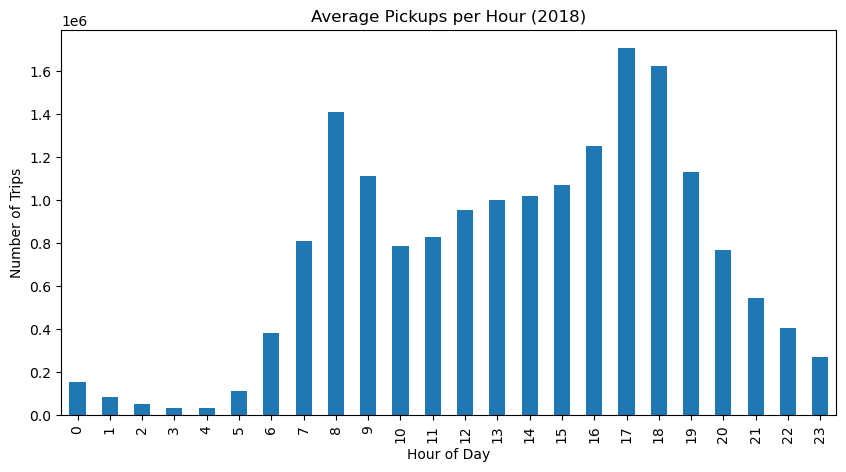

In [11]:
hourly = df1.groupby('hour').size()
plt.figure(figsize=(10,5))
hourly.plot(kind='bar')
plt.title("Average Pickups per Hour (2018)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()


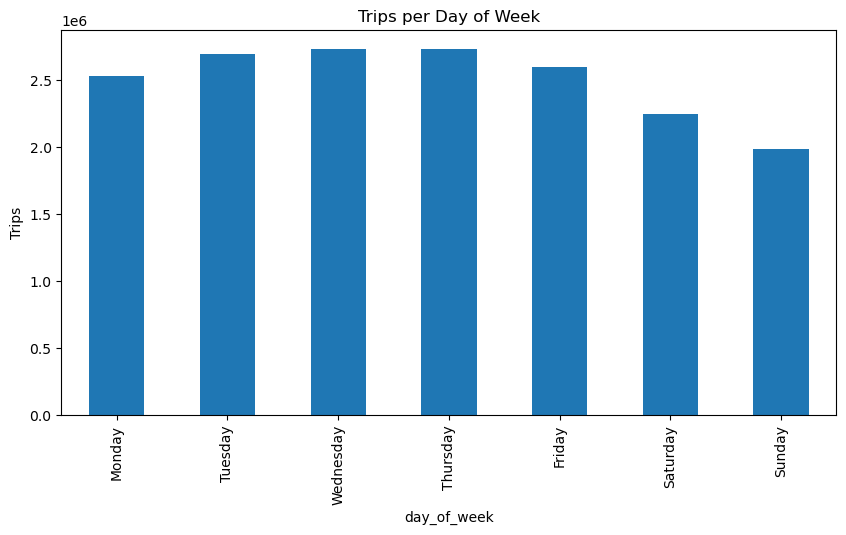

In [12]:
weekly = df1.groupby('day_of_week').size().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10,5))
weekly.plot(kind='bar')
plt.title("Trips per Day of Week")
plt.ylabel("Trips")
plt.show()


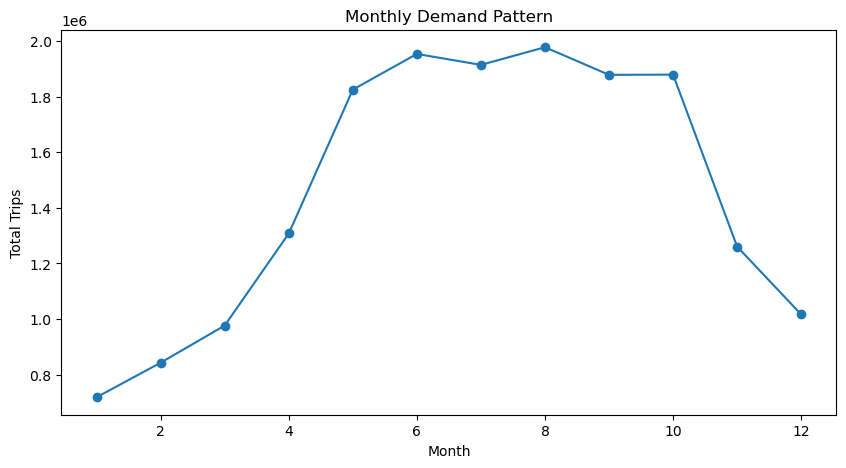

In [13]:
monthly = df1.groupby('month').size()

plt.figure(figsize=(10,5))
monthly.plot(kind='line', marker='o')
plt.title("Monthly Demand Pattern")
plt.xlabel("Month")
plt.ylabel("Total Trips")
plt.show()

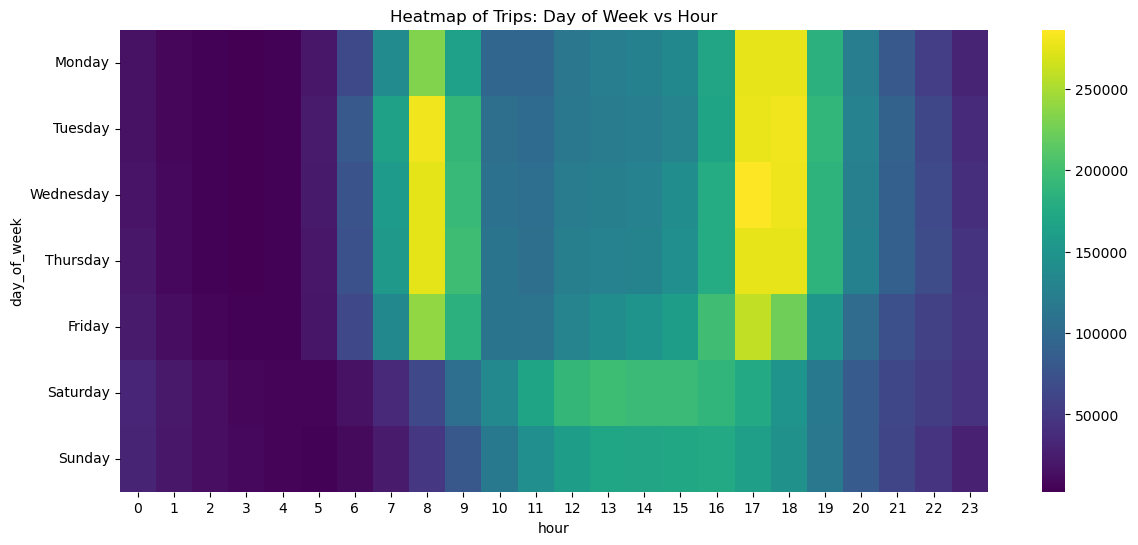

In [14]:
pivot = df1.pivot_table(index='day_of_week', 
                       columns='hour', 
                       values='bikeid', 
                       aggfunc='count')

# Reorder rows
pivot = pivot.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="viridis")
plt.title("Heatmap of Trips: Day of Week vs Hour")
plt.show()


In [15]:
K = 30
kmeans = KMeans(n_clusters=K, random_state=0)
coordinates_station['clusters'] = kmeans.fit_predict(coordinates_station.iloc[:, 1:3])

c:\Users\Ludvig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ludvig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [16]:
coordinates_station.head()

,start_station_id,start_station_latitude,start_station_longitude,clusters
0,72.0,40.767272,-73.993929,7
1324,79.0,40.719116,-74.006667,6
2430,82.0,40.711174,-74.000165,6
2866,83.0,40.683826,-73.976323,14
3551,119.0,40.696089,-73.978034,12


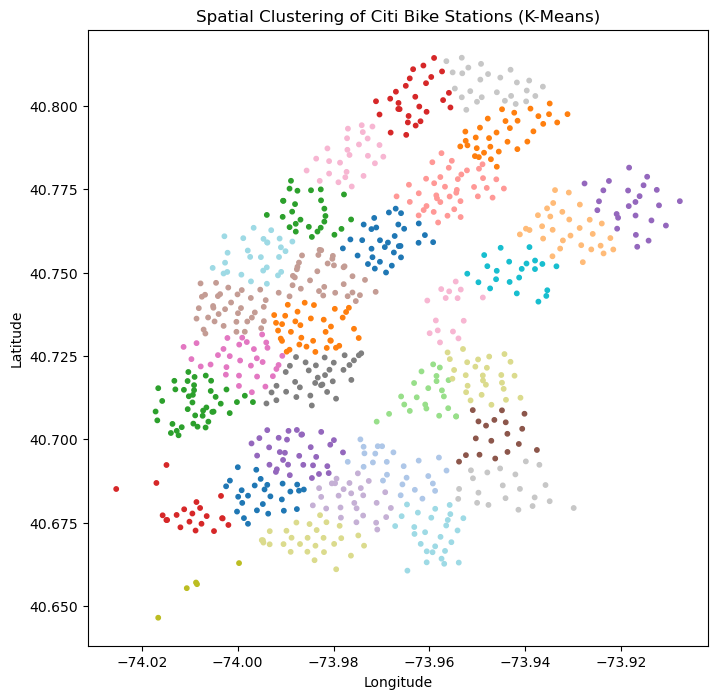

In [17]:
coordinates_station['clusters'].value_counts().sort_index()
plt.figure(figsize=(8,8))
plt.scatter(coordinates_station['start_station_longitude'], coordinates_station['start_station_latitude'], c=coordinates_station['clusters'], cmap='tab20', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Clustering of Citi Bike Stations (K-Means)')
plt.show()


In [20]:
df1 = df1.merge(
    coordinates_station[['start_station_id', 'clusters']],
    on='start_station_id',
    how='left'
).rename(columns={'clusters': 'start_cluster'})

df1 = df1.merge(
    coordinates_station[['start_station_id', 'clusters']],
    left_on='end_station_id',
    right_on='start_station_id',
    how='left'
).rename(columns={'clusters': 'end_cluster'})

In [21]:
pickups = df1.groupby(['start_cluster', 'hour']).size().reset_index(name='pickups')
dropoffs = df.groupby(['end_cluster', 'hour']).size().reset_index(name='dropoffs')

ValueError: Grouper for 'start_cluster' not 1-dimensional